In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('insurance froud.csv')

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

we see that the last column c39 are blank so we delete this column.

In [5]:
df=df.drop(['_c39'],axis=1)

In [6]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


we see that there are 39 columns and 1000 rows data are present.

In [7]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

we see that there are 753 accidents are not reported and only 247 are reported.

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
df1=df.select_dtypes(object)

In [10]:
for i in df1:
    le=LabelEncoder()
    df1[i]=le.fit_transform(df1[i])

In [11]:
df1

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,532,2,1,1,4,2,17,0,49,2,...,0,4,4,1,996,2,2,10,1,1
1,821,1,1,1,4,6,15,2,41,3,...,1,4,5,5,628,0,0,8,12,1
2,186,2,0,0,6,11,2,3,44,0,...,1,4,1,1,685,1,1,4,30,0
3,766,0,1,0,6,1,2,4,19,2,...,0,4,2,0,669,0,1,3,34,1
4,181,0,2,1,0,11,2,4,34,3,...,1,2,1,0,220,1,1,0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,487,2,2,0,5,2,13,4,44,2,...,1,1,0,4,561,2,0,6,6,0
996,129,0,0,0,6,9,17,5,47,2,...,0,1,4,3,227,2,0,13,28,0
997,509,2,1,0,5,1,3,2,45,0,...,1,4,0,0,746,0,2,11,19,0
998,573,0,2,1,0,5,0,5,52,2,...,0,3,1,0,569,0,2,1,5,0


In [12]:
df2=df.select_dtypes(float)

In [13]:
df2

,policy_annual_premium
0,1406.91
1,1197.22
2,1413.14
3,1415.74
4,1583.91
...,...
995,1310.80
996,1436.79
997,1383.49
998,1356.92


In [14]:
df3=df.select_dtypes(int)
df3

,months_as_customer,age,policy_number,policy_deductable,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,521585,1000,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,342868,2000,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,687698,2000,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,227811,2000,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,367455,1000,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,0,431289,0,0,20,1,0,1,87200,17440,8720,61040,2006
996,285,41,186934,1000,0,608177,70900,0,23,1,2,3,108480,18080,18080,72320,2015
997,130,34,918516,500,3000000,442797,35100,0,4,3,2,3,67500,7500,7500,52500,1996
998,458,62,533940,2000,5000000,441714,0,0,2,1,0,1,46980,5220,5220,36540,1998


In [15]:
df=pd.concat([df1 , df2,df3], axis=1)

In [16]:
df

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,532,2,1,1,4,2,17,0,49,2,...,0,5,1,1,2,71610,6510,13020,52080,2004
1,821,1,1,1,4,6,15,2,41,3,...,0,8,1,0,0,5070,780,780,3510,2007
2,186,2,0,0,6,11,2,3,44,0,...,0,7,3,2,3,34650,7700,3850,23100,2007
3,766,0,1,0,6,1,2,4,19,2,...,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,181,0,2,1,0,11,2,4,34,3,...,-46000,20,1,0,1,6500,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,487,2,2,0,5,2,13,4,44,2,...,0,20,1,0,1,87200,17440,8720,61040,2006
996,129,0,0,0,6,9,17,5,47,2,...,0,23,1,2,3,108480,18080,18080,72320,2015
997,509,2,1,0,5,1,3,2,45,0,...,0,4,3,2,3,67500,7500,7500,52500,1996
998,573,0,2,1,0,5,0,5,52,2,...,0,2,1,0,1,46980,5220,5220,36540,1998


In [17]:
df.shape

(1000, 39)

we have the sufficent data so we gp further process.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   policy_bind_date             1000 non-null   int32  
 1   policy_state                 1000 non-null   int32  
 2   policy_csl                   1000 non-null   int32  
 3   insured_sex                  1000 non-null   int32  
 4   insured_education_level      1000 non-null   int32  
 5   insured_occupation           1000 non-null   int32  
 6   insured_hobbies              1000 non-null   int32  
 7   insured_relationship         1000 non-null   int32  
 8   incident_date                1000 non-null   int32  
 9   incident_type                1000 non-null   int32  
 10  collision_type               1000 non-null   int32  
 11  incident_severity            1000 non-null   int32  
 12  authorities_contacted        1000 non-null   int32  
 13  incident_state     

In [19]:
df.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported', 'policy_annual_premium', 'months_as_customer', 'age',
       'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

2    352
0    338
1    310
Name: policy_state, dtype: int64


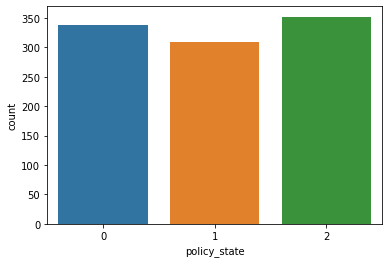

In [20]:
sns.countplot('policy_state', data=df)
print(df['policy_state'].value_counts())

1    351
0    349
2    300
Name: policy_csl, dtype: int64


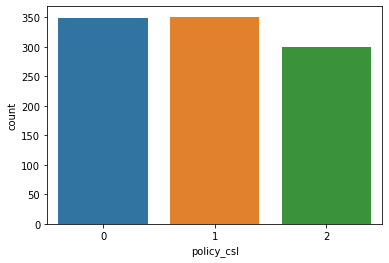

In [21]:
sns.countplot('policy_csl', data=df)
print(df['policy_csl'].value_counts())

0    537
1    463
Name: insured_sex, dtype: int64


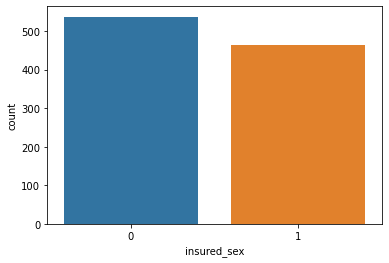

In [22]:
sns.countplot('insured_sex', data=df)
print(df['insured_sex'].value_counts())

3    161
2    160
0    145
4    144
5    143
6    125
1    122
Name: insured_education_level, dtype: int64


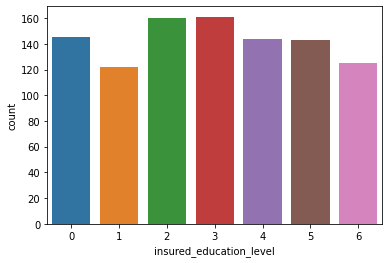

In [23]:
sns.countplot('insured_education_level', data=df)
print(df['insured_education_level'].value_counts())

6     93
9     85
12    78
11    76
3     76
2     74
13    72
7     71
8     71
1     69
0     65
10    63
5     54
4     53
Name: insured_occupation, dtype: int64


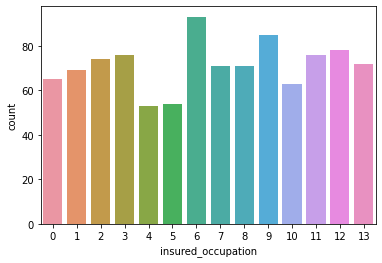

In [24]:
sns.countplot('insured_occupation', data=df)
print(df['insured_occupation'].value_counts())

3    183
2    177
1    174
0    170
5    155
4    141
Name: insured_relationship, dtype: int64


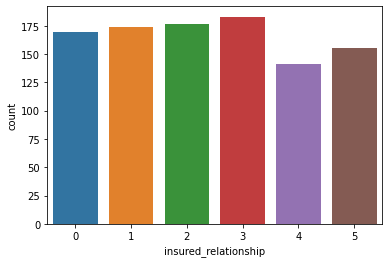

In [25]:
sns.countplot('insured_relationship', data=df)
print(df['insured_relationship'].value_counts())

0    419
2    403
3     94
1     84
Name: incident_type, dtype: int64


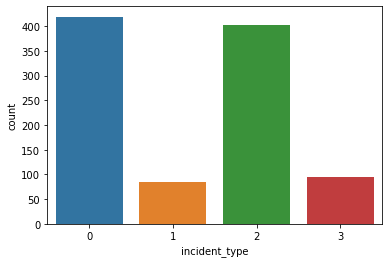

In [26]:
sns.countplot('incident_type', data=df)
print(df['incident_type'].value_counts())

2    292
3    276
1    254
0    178
Name: collision_type, dtype: int64


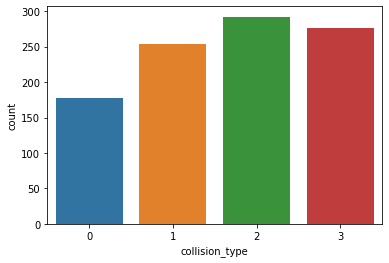

In [27]:
sns.countplot('collision_type', data=df)
print(df['collision_type'].value_counts())

1    354
2    280
0    276
3     90
Name: incident_severity, dtype: int64


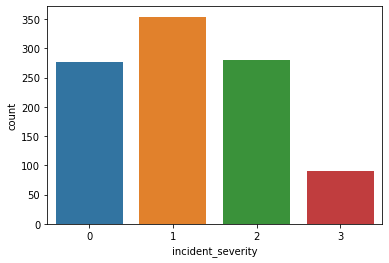

In [28]:
sns.countplot('incident_severity', data=df)
print(df['incident_severity'].value_counts())

4    292
1    223
3    198
0    196
2     91
Name: authorities_contacted, dtype: int64


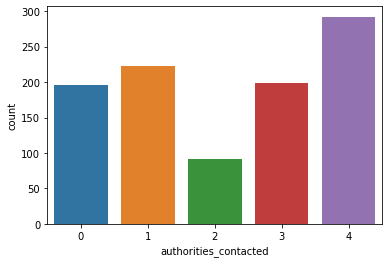

In [29]:
sns.countplot('authorities_contacted', data=df)
print(df['authorities_contacted'].value_counts())

1    262
4    248
6    217
5    110
0    110
3     30
2     23
Name: incident_state, dtype: int64


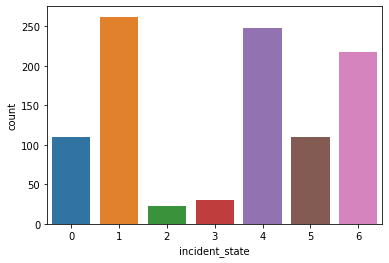

In [30]:
sns.countplot('incident_state', data=df)
print(df['incident_state'].value_counts())

6    157
0    152
1    149
3    145
2    141
5    134
4    122
Name: incident_city, dtype: int64


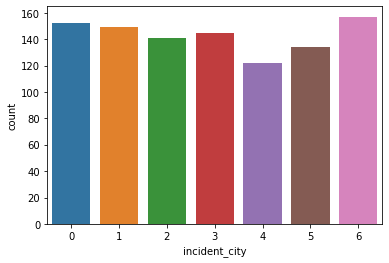

In [31]:
sns.countplot('incident_city', data=df)
print(df['incident_city'].value_counts())

0    360
1    338
2    302
Name: property_damage, dtype: int64


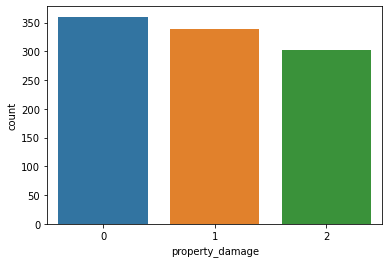

In [32]:
sns.countplot('property_damage', data=df)
print(df['property_damage'].value_counts())

0    343
1    343
2    314
Name: police_report_available, dtype: int64


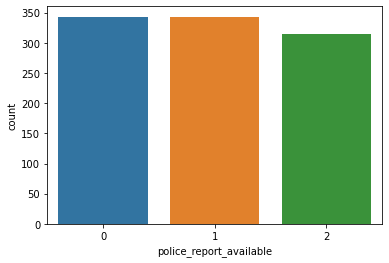

In [33]:
sns.countplot('police_report_available', data=df)
print(df['police_report_available'].value_counts())

10    80
4     80
11    80
9     78
3     76
5     72
2     72
12    70
1     69
0     68
13    68
7     67
8     65
6     55
Name: auto_make, dtype: int64


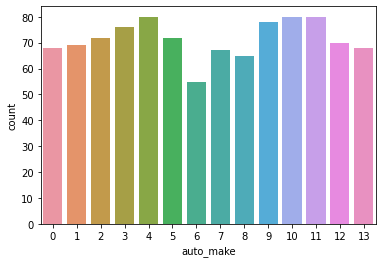

In [34]:
sns.countplot('auto_make', data=df)
print(df['auto_make'].value_counts())

30    43
36    42
4     37
27    37
23    36
20    35
28    33
5     32
21    32
29    31
25    30
1     28
9     28
15    28
14    27
3     27
12    27
2     25
17    25
13    24
34    24
26    24
35    23
37    23
18    22
10    22
32    22
16    21
24    20
19    20
11    20
33    20
8     20
7     18
0     18
38    16
22    15
6     13
31    12
Name: auto_model, dtype: int64


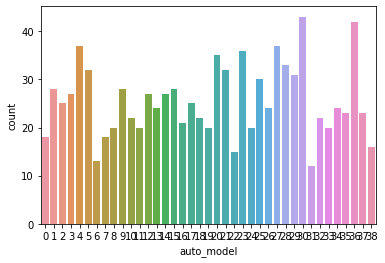

In [35]:
sns.countplot('auto_model', data=df)
print(df['auto_model'].value_counts())

0    753
1    247
Name: fraud_reported, dtype: int64


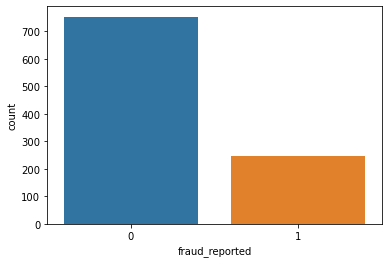

In [36]:
sns.countplot('fraud_reported', data=df)
print(df['fraud_reported'].value_counts())

2    352
0    338
1    310
Name: policy_state, dtype: int64


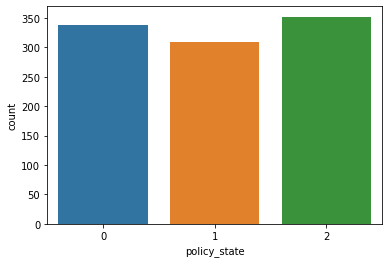

In [37]:
sns.countplot('policy_state', data=df)
print(df['policy_state'].value_counts())

0    419
2    403
3     94
1     84
Name: incident_type, dtype: int64


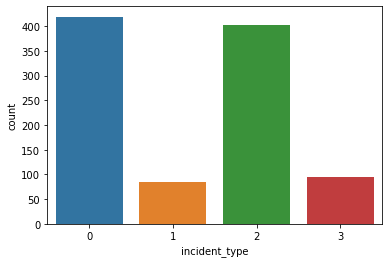

In [38]:
sns.countplot('incident_type', data=df)
print(df['incident_type'].value_counts())

0    343
1    343
2    314
Name: police_report_available, dtype: int64


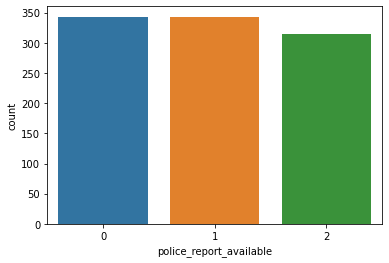

In [39]:
sns.countplot('police_report_available', data=df)
print(df['police_report_available'].value_counts())

<AxesSubplot:xlabel='policy_annual_premium', ylabel='policy_state'>

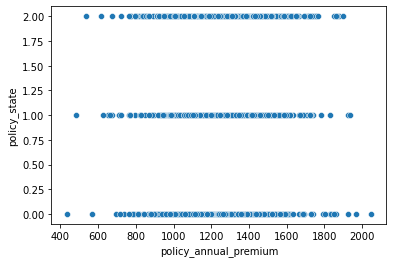

In [40]:
sns.scatterplot(x='policy_annual_premium', y= 'policy_state', data=df)

<AxesSubplot:xlabel='policy_annual_premium', ylabel='insured_education_level'>

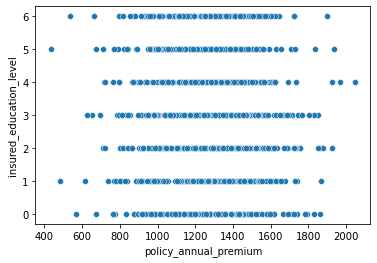

In [41]:
sns.scatterplot(x='policy_annual_premium', y= 'insured_education_level', data=df)

<AxesSubplot:xlabel='policy_annual_premium', ylabel='insured_occupation'>

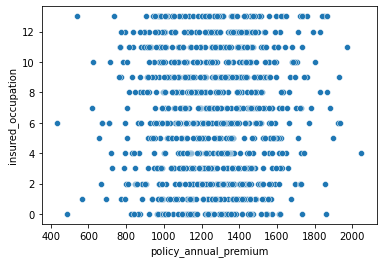

In [42]:
sns.scatterplot(x='policy_annual_premium', y= 'insured_occupation', data=df)

<AxesSubplot:xlabel='policy_annual_premium', ylabel='incident_type'>

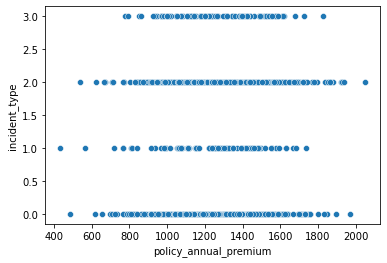

In [43]:
sns.scatterplot(x='policy_annual_premium', y= 'incident_type', data=df)

<AxesSubplot:xlabel='policy_annual_premium', ylabel='incident_city'>

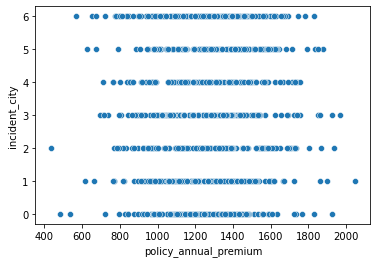

In [44]:
sns.scatterplot(x='policy_annual_premium', y= 'incident_city', data=df)

<AxesSubplot:xlabel='policy_annual_premium', ylabel='property_damage'>

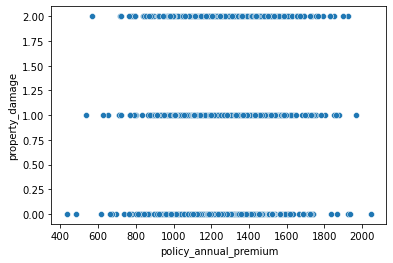

In [45]:
sns.scatterplot(x='policy_annual_premium', y= 'property_damage', data=df)

<AxesSubplot:xlabel='policy_annual_premium', ylabel='auto_make'>

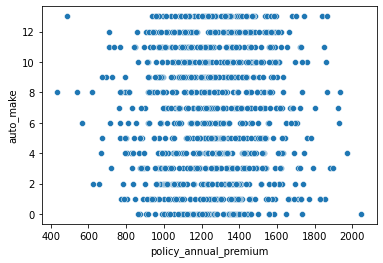

In [46]:
sns.scatterplot(x='policy_annual_premium', y= 'auto_make', data=df)

<AxesSubplot:xlabel='policy_annual_premium', ylabel='auto_model'>

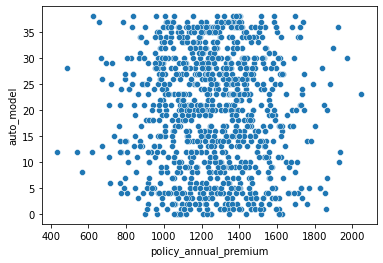

In [47]:
sns.scatterplot(x='policy_annual_premium', y= 'auto_model', data=df)

we visualize the data then next further

# Describtion of data

In [48]:
df.describe()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,474.332000,1.01400,0.951000,0.463000,2.966000,6.653000,9.731000,2.416000,29.376000,1.172000,...,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,275.402851,0.83096,0.804516,0.498879,1.948497,4.019048,5.674049,1.681003,17.249875,1.081474,...,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,233.750000,0.00000,0.000000,0.000000,1.000000,3.000000,5.000000,1.000000,14.750000,0.000000,...,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,472.500000,1.00000,1.000000,0.000000,3.000000,7.000000,10.000000,2.000000,29.500000,1.000000,...,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,713.250000,2.00000,2.000000,1.000000,5.000000,10.000000,15.000000,4.000000,44.000000,2.000000,...,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,950.000000,2.00000,2.000000,1.000000,6.000000,13.000000,19.000000,5.000000,59.000000,3.000000,...,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


<AxesSubplot:>

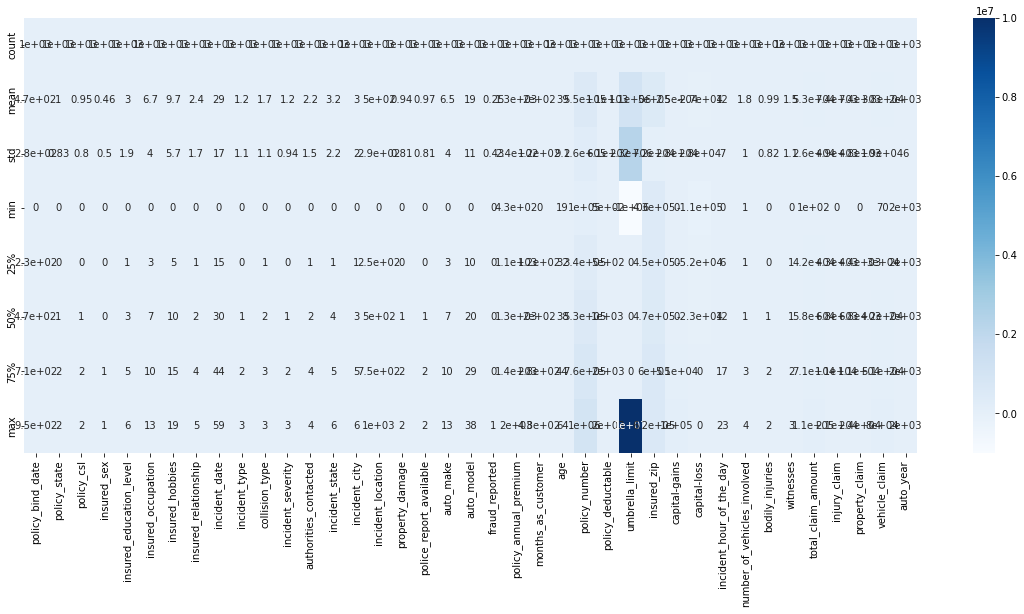

In [49]:
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(), cmap='Blues', annot=True)

we see the correlation with each other

# correlation

In [50]:
df.corr()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
policy_bind_date,1.000000,0.015289,0.008486,0.039338,0.040606,0.006720,0.020085,0.017710,0.008022,0.000164,...,-0.026123,-0.012582,-0.002381,-0.046970,-0.007004,0.015901,0.024160,0.008611,0.013784,0.035067
policy_state,0.015289,1.000000,0.001027,-0.020481,-0.034327,-0.031215,-0.038689,-0.018506,0.027287,0.031848,...,-0.030338,0.029457,-0.042263,0.013384,0.022960,-0.006002,-0.046290,0.008406,0.001425,0.002114
policy_csl,0.008486,0.001027,1.000000,-0.010757,0.009153,0.015788,-0.005960,-0.030063,-0.010140,0.011997,...,-0.034612,-0.001869,-0.019403,-0.000595,0.071500,-0.055758,-0.078818,-0.042216,-0.046791,-0.033082
insured_sex,0.039338,-0.020481,-0.010757,1.000000,0.009002,-0.006160,-0.020317,0.002855,0.001618,0.009952,...,-0.021705,0.019290,0.018793,-0.020297,0.042463,-0.023727,0.000924,-0.014868,-0.029609,-0.028247
insured_education_level,0.040606,-0.034327,0.009153,0.009002,1.000000,-0.020298,0.021807,-0.023488,-0.039556,0.013704,...,0.041193,-0.057061,-0.003768,-0.012072,0.019211,0.074226,0.081880,0.055794,0.068348,0.043509
insured_occupation,0.006720,-0.031215,0.015788,-0.006160,-0.020298,1.000000,-0.011077,-0.010171,-0.018518,0.003842,...,-0.020171,-0.018435,-0.015368,-0.000236,-0.014794,0.003692,0.020211,0.003004,-0.000829,-0.006676
insured_hobbies,0.020085,-0.038689,-0.005960,-0.020317,0.021807,-0.011077,1.000000,-0.096772,0.017879,0.007711,...,-0.031811,0.019979,0.012586,0.031373,-0.033971,-0.004488,0.028393,0.012535,-0.016814,-0.014495
insured_relationship,0.017710,-0.018506,-0.030063,0.002855,-0.023488,-0.010171,-0.096772,1.000000,-0.080896,0.033834,...,-0.064453,0.004805,-0.047354,-0.001214,0.002362,0.002229,0.029014,0.007332,-0.006256,-0.023345
incident_date,0.008022,0.027287,-0.010140,0.001618,-0.039556,-0.018518,0.017879,-0.080896,1.000000,0.003827,...,-0.009373,-0.017782,-0.012499,-0.020165,0.004328,-0.034415,-0.027240,-0.010669,-0.038345,0.006302
incident_type,0.000164,0.031848,0.011997,0.009952,0.013704,0.003842,0.007711,0.033834,0.003827,1.000000,...,0.026101,-0.133387,-0.893274,-0.009733,-0.007299,-0.276686,-0.226704,-0.221409,-0.271635,-0.053191


<AxesSubplot:>

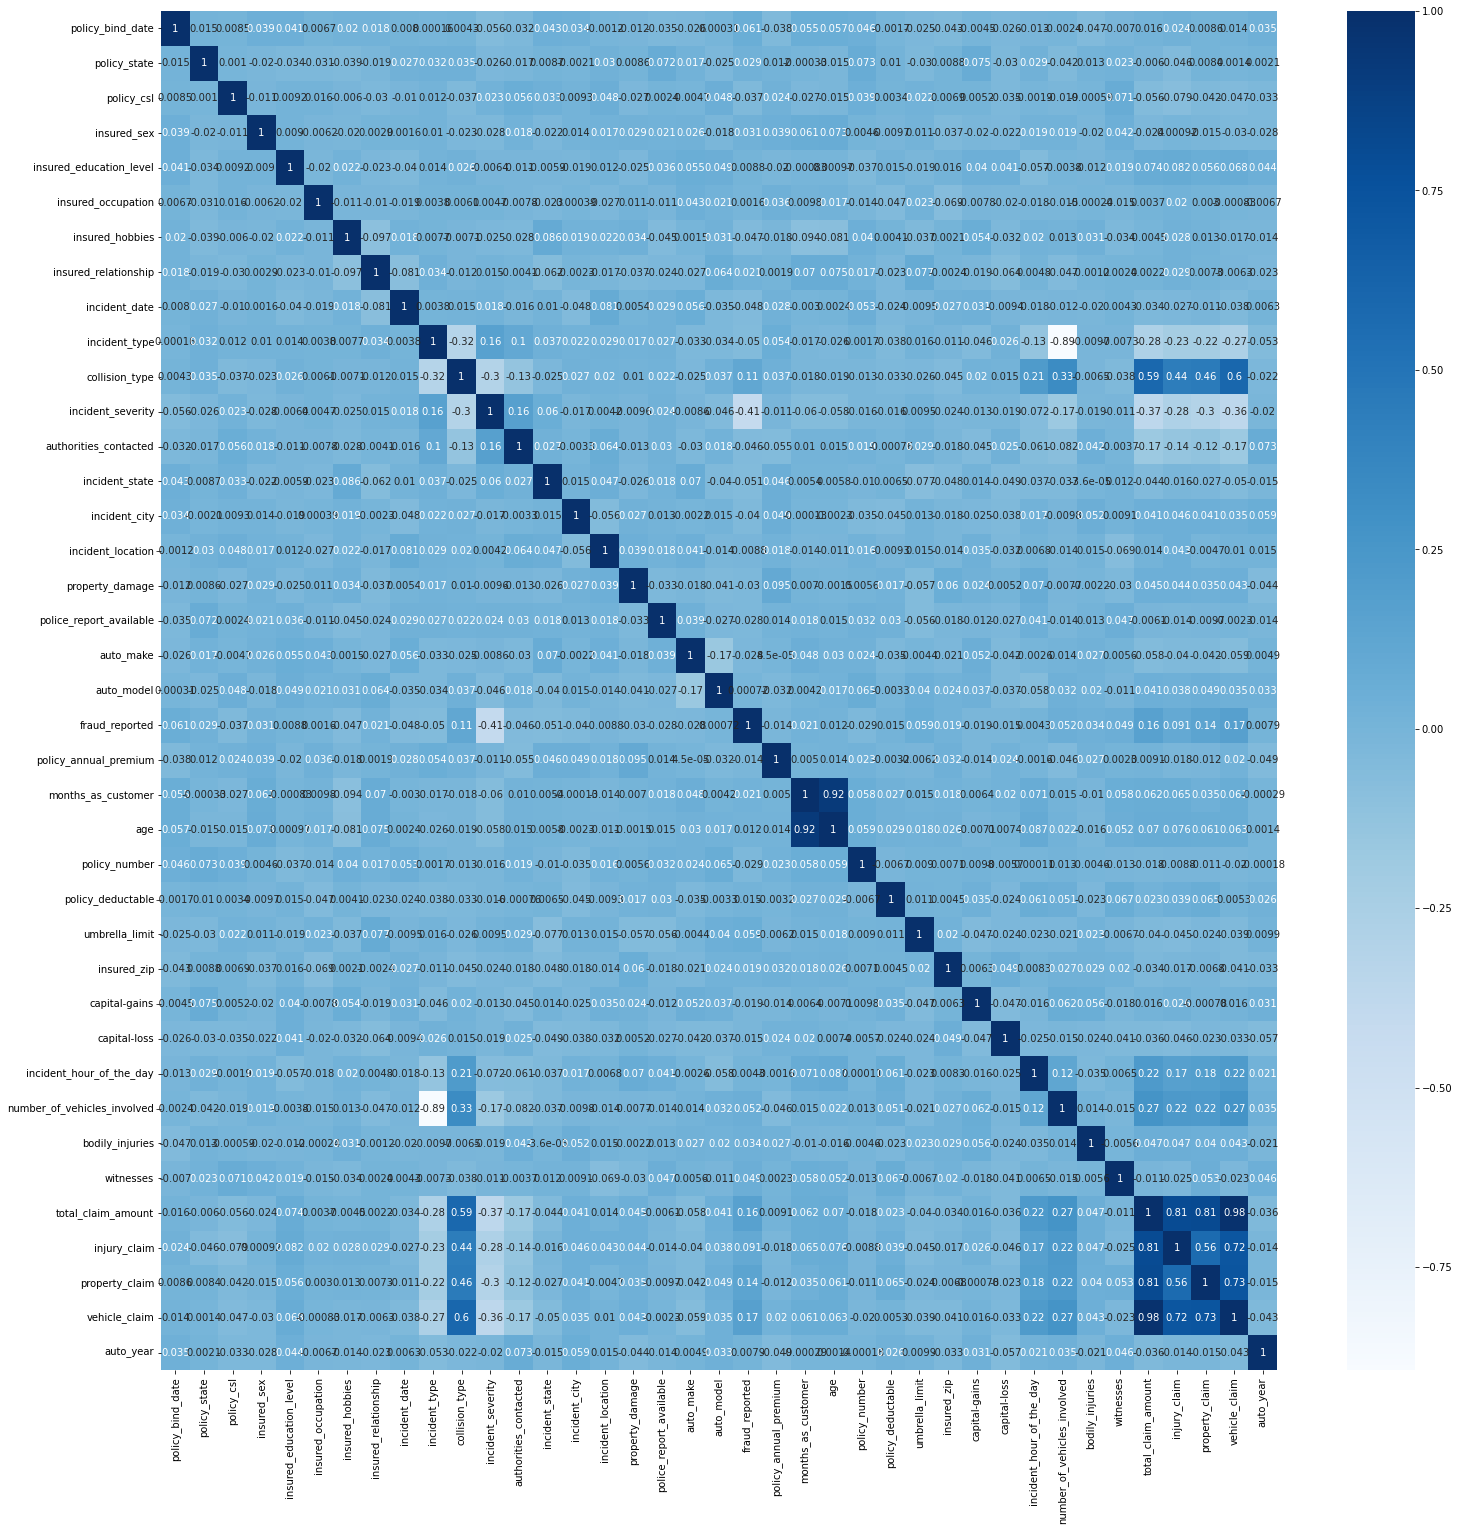

In [51]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), cmap='Blues', annot=True)

In [52]:
df=df.drop(['vehicle_claim','months_as_customer'],axis=1)

In [53]:
df.head()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,auto_year
0,532,2,1,1,4,2,17,0,49,2,...,53300,0,5,1,1,2,71610,6510,13020,2004
1,821,1,1,1,4,6,15,2,41,3,...,0,0,8,1,0,0,5070,780,780,2007
2,186,2,0,0,6,11,2,3,44,0,...,35100,0,7,3,2,3,34650,7700,3850,2007
3,766,0,1,0,6,1,2,4,19,2,...,48900,-62400,5,1,1,2,63400,6340,6340,2014
4,181,0,2,1,0,11,2,4,34,3,...,66000,-46000,20,1,0,1,6500,1300,650,2009


# skewness

In [54]:
df.skew()

policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
property_damage                0.106418
police_report_available        0.052967
auto_make                     -0.018797
auto_model                    -0.080773
fraud_reported                 1.175051
policy_annual_premium          0.004402
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887


In [55]:
df.corr()['fraud_reported'].sort_values()

incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
incident_date                 -0.047726
insured_hobbies               -0.046838
authorities_contacted         -0.045802
incident_city                 -0.040403
policy_csl                    -0.037190
property_damage               -0.030497
policy_number                 -0.029443
police_report_available       -0.028159
auto_make                     -0.027519
capital-gains                 -0.019173
capital-loss                  -0.014863
policy_annual_premium         -0.014480
incident_location             -0.008832
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
auto_year                      0.007928
insured_education_level        0.008808
age                            0.012143
policy_deductable              0.014817
insured_zip                    0.019368
insured_relationship           0.021043


there are not very good skewness.

<AxesSubplot:xlabel='policy_state', ylabel='Density'>

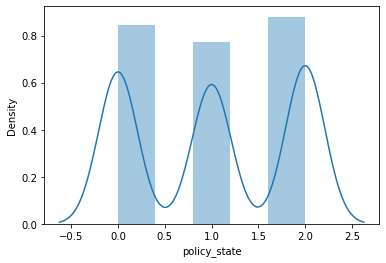

In [56]:
sns.distplot(df['policy_state'])

<AxesSubplot:xlabel='police_report_available', ylabel='Density'>

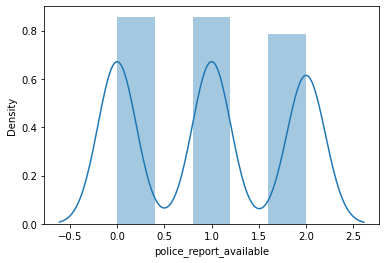

In [57]:
sns.distplot(df['police_report_available'])

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

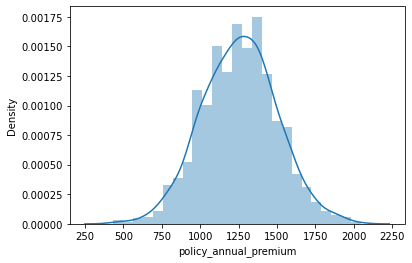

In [58]:
sns.distplot(df['policy_annual_premium'])

<AxesSubplot:>

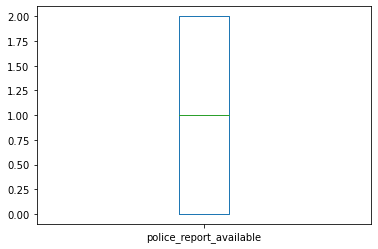

In [59]:
df['police_report_available'].plot.box()

# outliers removing

In [60]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975], dtype=int64),
 array([25, 25, 25, 25, 25, 21, 21, 25, 25, 25, 25, 35, 25, 25, 25, 21, 28,
        25, 25, 25], dtype=int64))

In [61]:
z.iloc[31]

policy_bind_date               0.423839
policy_state                   1.220886
policy_csl                     1.182668
insured_sex                    1.076953
insured_education_level        0.017458
insured_occupation             1.158316
insured_hobbies                0.929078
insured_relationship           1.437957
incident_date                  1.544204
incident_type                  1.084249
collision_type                 1.254675
incident_severity              1.260614
authorities_contacted          1.196963
incident_state                 1.279896
incident_city                  0.995476
incident_location              1.387373
property_damage                0.071467
police_report_available        1.198712
auto_make                      0.383352
auto_model                     0.477785
fraud_reported                 1.746019
policy_annual_premium          0.331389
age                            0.213229
policy_number                  0.467412
policy_deductable              1.412784


In [62]:
df_new=df[(z<3).all(axis=1)]
print('old dataframe', df.shape)
print('new dataframe',df_new.shape)
print('total dropped rows', df.shape[0]-df_new.shape[0])

old dataframe (1000, 37)
new dataframe (980, 37)
total dropped rows 20


# percentage data loss

In [63]:
loss_percent=(1000-980)/1000*100
print(loss_percent, '%')

2.0 %


In [65]:
x=df_new.drop('fraud_reported',axis=1)
y=df_new['fraud_reported']

# transforming data to remove skewness

In [66]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [67]:
x

array([[ 0.29902129,  1.14147704,  0.18905105, ...,  0.00858172,
         1.08980208, -0.20443508],
       [ 1.1824092 ,  0.05900219,  0.18905105, ..., -1.52209542,
        -1.5637232 ,  0.29587688],
       [-0.99804174,  1.14147704, -1.23186716, ...,  0.22617755,
        -0.58207486,  0.29587688],
       ...,
       [ 0.22317302,  1.14147704,  0.18905105, ...,  0.1906937 ,
         0.18625419, -1.49935977],
       [ 0.43183104, -1.26576425,  1.23338925, ..., -0.24807391,
        -0.26790911, -1.18090064],
       [-0.30029896,  1.14147704,  0.18905105, ..., -1.69309349,
        -1.49907329,  0.29587688]])

In [68]:
pd.DataFrame(x).skew()

0    -0.293677
1    -0.150765
2    -0.096814
3     0.139324
4    -0.187642
5    -0.238129
6    -0.248575
7    -0.160168
8    -0.264010
9    -0.095572
10   -0.204055
11   -0.079569
12   -0.223816
13   -0.256064
14   -0.181833
15   -0.288690
16   -0.093063
17   -0.117961
18   -0.229846
19   -0.276099
20   -0.007258
21   -0.002183
22   -0.161791
23    0.022179
24   -7.932397
25    0.000000
26    0.031294
27    0.088750
28   -0.258027
29    0.372833
30   -0.133824
31   -0.151669
32   -0.508540
33   -0.416732
34   -0.357397
35   -0.013973
dtype: float64

In [69]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.29902129,  1.14147704,  0.18905105, ...,  0.00858172,
         1.08980208, -0.20443508],
       [ 1.1824092 ,  0.05900219,  0.18905105, ..., -1.52209542,
        -1.5637232 ,  0.29587688],
       [-0.99804174,  1.14147704, -1.23186716, ...,  0.22617755,
        -0.58207486,  0.29587688],
       ...,
       [ 0.22317302,  1.14147704,  0.18905105, ...,  0.1906937 ,
         0.18625419, -1.49935977],
       [ 0.43183104, -1.26576425,  1.23338925, ..., -0.24807391,
        -0.26790911, -1.18090064],
       [-0.30029896,  1.14147704,  0.18905105, ..., -1.69309349,
        -1.49907329,  0.29587688]])

# model traing process

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [86]:
maxAccu=0
maxRS=0

for i in range(1,20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train, y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    print('accuracy',acc,'random state',i)

if acc>maxAccu:
    maxAccu=acc
    maxRS=i

accuracy 0.7959183673469388 random state 1
accuracy 0.7397959183673469 random state 2
accuracy 0.8163265306122449 random state 3
accuracy 0.8061224489795918 random state 4
accuracy 0.7653061224489796 random state 5
accuracy 0.8112244897959183 random state 6
accuracy 0.8010204081632653 random state 7
accuracy 0.7908163265306123 random state 8
accuracy 0.8367346938775511 random state 9
accuracy 0.8214285714285714 random state 10
accuracy 0.7857142857142857 random state 11
accuracy 0.7755102040816326 random state 12
accuracy 0.7908163265306123 random state 13
accuracy 0.7653061224489796 random state 14
accuracy 0.7857142857142857 random state 15
accuracy 0.7551020408163265 random state 16
accuracy 0.7244897959183674 random state 17
accuracy 0.75 random state 18
accuracy 0.7806122448979592 random state 19


creating the train test splite

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=9)

In [88]:
x_train

array([[-0.57853174, -1.26576425,  0.18905105, ..., -1.31597961,
        -1.63866775, -1.34056448],
       [ 1.40916539,  1.14147704,  0.18905105, ...,  0.16200767,
         0.15647329, -1.49935977],
       [ 1.48984921, -1.26576425,  1.23338925, ...,  0.11114063,
         1.24879051, -0.20443508],
       ...,
       [ 0.20987771,  0.05900219, -1.23186716, ...,  0.23850145,
         1.4465434 ,  0.46446666],
       [-0.14445503,  1.14147704,  0.18905105, ...,  0.73846834,
         0.75701163,  0.80440196],
       [ 0.78696103,  0.05900219,  0.18905105, ..., -0.14562324,
        -0.16213435,  1.32126244]])

In [89]:
y_train

303    0
435    0
331    1
100    0
981    0
      ..
969    0
514    0
651    0
357    0
391    0
Name: fraud_reported, Length: 784, dtype: int32

In [90]:
x_test

array([[-1.3758055 , -1.26576425,  0.18905105, ..., -0.29024886,
        -2.19363461, -0.36940149],
       [-0.99804174,  1.14147704, -1.23186716, ...,  0.22617755,
        -0.58207486,  0.29587688],
       [-0.74412824, -1.26576425,  1.23338925, ...,  1.3305471 ,
         1.37781196, -1.6572908 ],
       ...,
       [-0.20904981,  1.14147704,  0.18905105, ...,  0.85219819,
         0.87596816, -0.03856952],
       [-0.12666754,  1.14147704,  1.23338925, ...,  1.2023619 ,
         0.09989035, -1.02036393],
       [-1.5713219 , -1.26576425,  0.18905105, ..., -1.69309349,
        -1.49907329, -0.36940149]])

In [91]:
y_test

194    0
2      0
530    0
307    1
216    0
      ..
486    0
258    0
489    1
308    0
783    0
Name: fraud_reported, Length: 196, dtype: int32

# model building

# Logistics regression

In [119]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train, y_train)
predlr=LR.predict(x_test)
print('accuracy', accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

accuracy 83.6734693877551
[[140  15]
 [ 17  24]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       155
           1       0.62      0.59      0.60        41

    accuracy                           0.84       196
   macro avg       0.75      0.74      0.75       196
weighted avg       0.83      0.84      0.84       196



In [132]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print('At cv', j)
    print('cross validation score is ',lsc*100)
    print('accuracy score is', lss*100)
    print('\n')

At cv 2
cross validation score is  77.65306122448979
accuracy score is 84.6938775510204


At cv 3
cross validation score is  77.55170322007717
accuracy score is 84.6938775510204


At cv 4
cross validation score is  78.77551020408163
accuracy score is 84.6938775510204


At cv 5
cross validation score is  78.6734693877551
accuracy score is 84.6938775510204


At cv 6
cross validation score is  78.36675145892563
accuracy score is 84.6938775510204


At cv 7
cross validation score is  78.06122448979592
accuracy score is 84.6938775510204


At cv 8
cross validation score is  77.85469145675063
accuracy score is 84.6938775510204


At cv 9
cross validation score is  78.46868275002832
accuracy score is 84.6938775510204




In [133]:
# select on cv value
lsscore_selected=cross_val_score(lr,x,y,cv=6).mean()
print('the cv score is-',lsscore_selected,'\n the accuracy score is-',lss)

the cv score is- 0.7836675145892563 
 the accuracy score is- 0.8469387755102041


# Decision Tress classification.

In [120]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('accuracy', accuracy_score(y_test, preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

accuracy 82.14285714285714
[[135  20]
 [ 15  26]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       155
           1       0.57      0.63      0.60        41

    accuracy                           0.82       196
   macro avg       0.73      0.75      0.74       196
weighted avg       0.83      0.82      0.83       196



# Random Forest Classifier

In [121]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('accuracy', accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

accuracy 85.20408163265306
[[145  10]
 [ 19  22]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       155
           1       0.69      0.54      0.60        41

    accuracy                           0.85       196
   macro avg       0.79      0.74      0.76       196
weighted avg       0.84      0.85      0.85       196



# Support Vector Classifier

In [122]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
ad_pred=svc.predict(x_test)
print('accuracy', accuracy_score(y_test, ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

accuracy 79.08163265306123
[[147   8]
 [ 33   8]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       155
           1       0.50      0.20      0.28        41

    accuracy                           0.79       196
   macro avg       0.66      0.57      0.58       196
weighted avg       0.75      0.79      0.75       196



# KNeighborsClassifier

In [123]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
ad_pred=knn.predict(x_test)
print('accuracy', accuracy_score(y_test, ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

accuracy 78.06122448979592
[[140  15]
 [ 28  13]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       155
           1       0.46      0.32      0.38        41

    accuracy                           0.78       196
   macro avg       0.65      0.61      0.62       196
weighted avg       0.76      0.78      0.76       196



# GaussianNB

In [124]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(x_train,y_train)
ad_pred=gn.predict(x_test)
print('accuracy', accuracy_score(y_test, ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

accuracy 79.59183673469387
[[125  30]
 [ 10  31]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       155
           1       0.51      0.76      0.61        41

    accuracy                           0.80       196
   macro avg       0.72      0.78      0.73       196
weighted avg       0.84      0.80      0.81       196



we see all types of the algorithams.

# cross validation

In [125]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print('cross validation score of logisct is', scr.mean())

cross validation score of logisct is 0.786734693877551


In [126]:
scr2=cross_val_score(dt,x,y,cv=5)
print('cross validation score of decision tree classifier is', scr2.mean())

cross validation score of decision tree classifier is 0.7775510204081633


In [127]:
scr3=cross_val_score(rf,x,y,cv=5)
print('cross validation score of random forest classifier is', scr3.mean())

cross validation score of random forest classifier is 0.7663265306122449


In [128]:
scr4=cross_val_score(svc,x,y,cv=5)
print('cross validation score of support vector classifier is', scr4.mean())

cross validation score of support vector classifier is 0.746938775510204


In [129]:
scr5=cross_val_score(knn,x,y,cv=5)
print('cross validation score of kneabhours is', scr5.mean())

cross validation score of kneabhours is 0.7357142857142858


In [130]:
scr6=cross_val_score(gn,x,y,cv=5)
print('cross validation score of GaussianNB is', scr6.mean())

cross validation score of GaussianNB is 0.7714285714285715


# saving the best model

In [135]:
import pickle
filename='insurance_froud.pkl'
pickle.dump(LR, open(filename, 'wb'))

# conclusion

In [136]:
import numpy as np
a=np.array(y_test)
predicted=np.array(LR.predict(x_test))
df_com=pd.DataFrame({'original':a, 'predicted':predicted}, index=range(len(a)))
df_com

,original,predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,1
...,...,...
191,0,0
192,0,0
193,1,0
194,0,0
